 # **MODEL KLASIFIKASI JENIS PENYAKIT MENTAL BERDASARKAN GEJALA**

In [ ]:
# Memasang Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **DATASET OVERVIEW**

In [ ]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/TUGAS_AKHIR/DATASET/Mental disorder symptoms_3.xlsx')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/TUGAS_AKHIR/DATASET/Mental disorder symptoms_3.xlsx'

In [ ]:
df['Disorder'].unique()

array(['MDD', 'OCD', 'ASD', 'bipolar', 'anexiety', 'eating disorder',
       'PDD', 'PTSD', 'ADHD', 'sleeping disorder', 'Loneliness',
       'psychotic deprission', 'Normal'], dtype=object)

## **EDA**

In [ ]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    647 non-null    int64 
 1   feeling.nervous              647 non-null    int64 
 2   panic                        647 non-null    int64 
 3   breathing.rapidly            647 non-null    int64 
 4   sweating                     647 non-null    int64 
 5   trouble.in.concentration     647 non-null    int64 
 6   having.trouble.in.sleeping   647 non-null    int64 
 7   having.trouble.with.work     647 non-null    int64 
 8   hopelessness                 647 non-null    int64 
 9   anger                        647 non-null    int64 
 10  over.react                   647 non-null    int64 
 11  change.in.eating             647 non-null    int64 
 12  suicidal.thought             647 non-null    int64 
 13  feeling.tired                647 no

In [ ]:
# Melihat jumlah null pada dataset
df.isnull().sum()

ag+1:629e                      0
feeling.nervous                0
panic                          0
breathing.rapidly              0
sweating                       0
trouble.in.concentration       0
having.trouble.in.sleeping     0
having.trouble.with.work       0
hopelessness                   0
anger                          0
over.react                     0
change.in.eating               0
suicidal.thought               0
feeling.tired                  0
close.friend                   0
social.media.addiction         0
weight.gain                    0
introvert                      0
popping.up.stressful.memory    0
having.nightmares              0
avoids.people.or.activities    0
feeling.negative               0
trouble.concentrating          0
blamming.yourself              0
hallucinations                 0
repetitive.behaviour           0
seasonally                     0
increased.energy               0
Disorder                       0
dtype: int64

**MELIHAT DISTRIBUSI DATA SEMUA KOLOM**

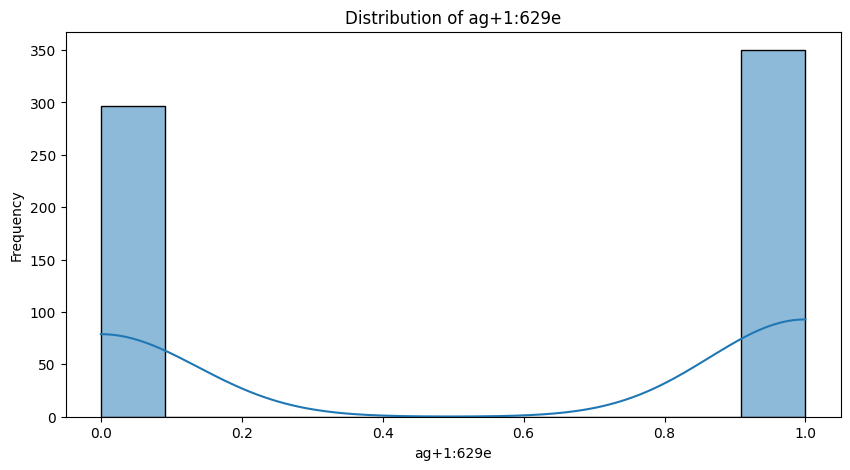

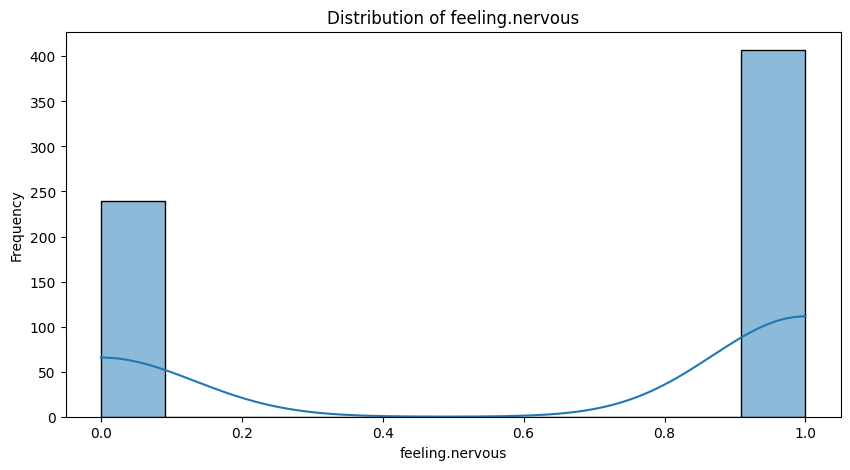

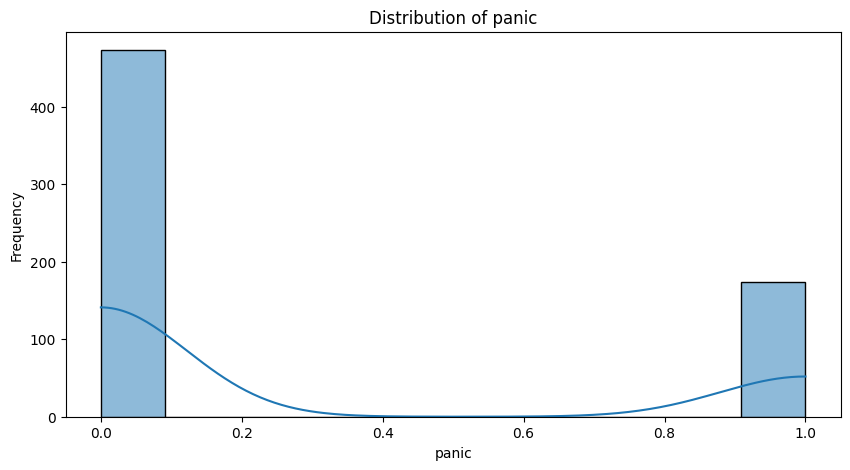

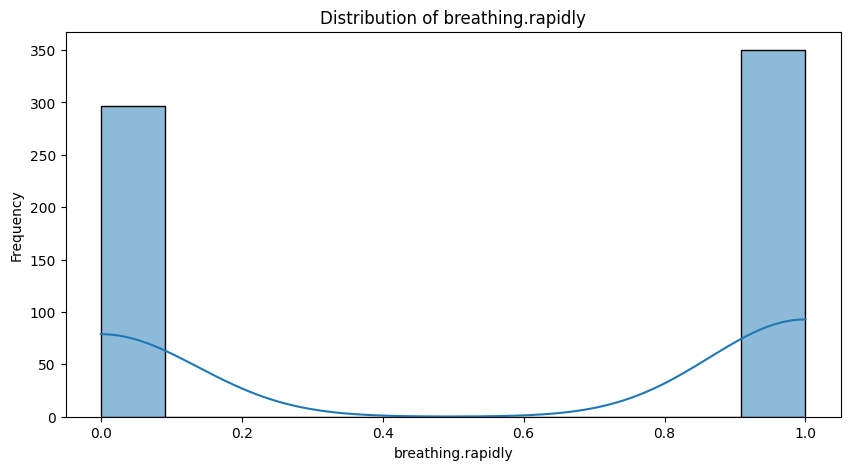

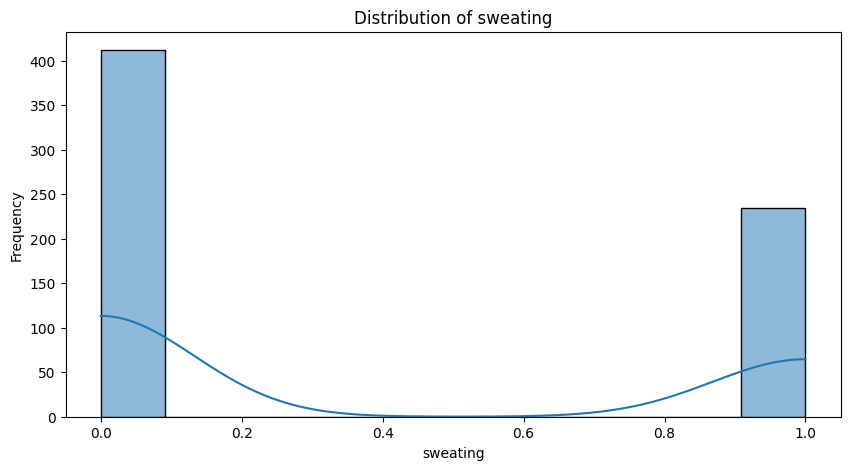

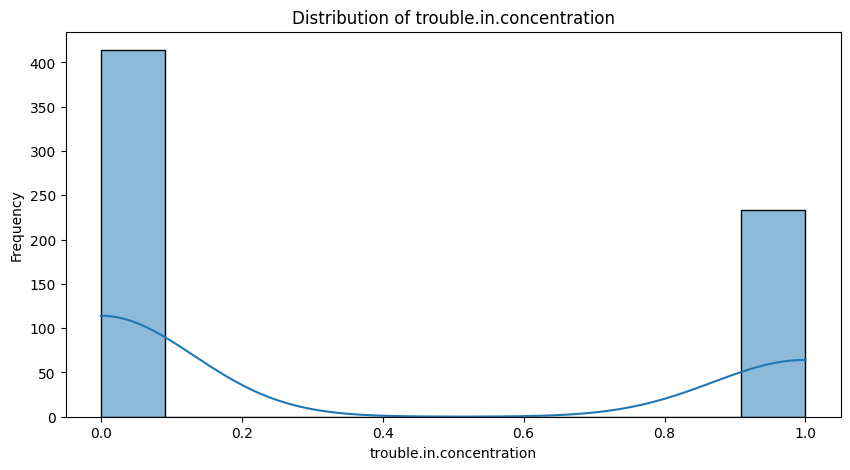

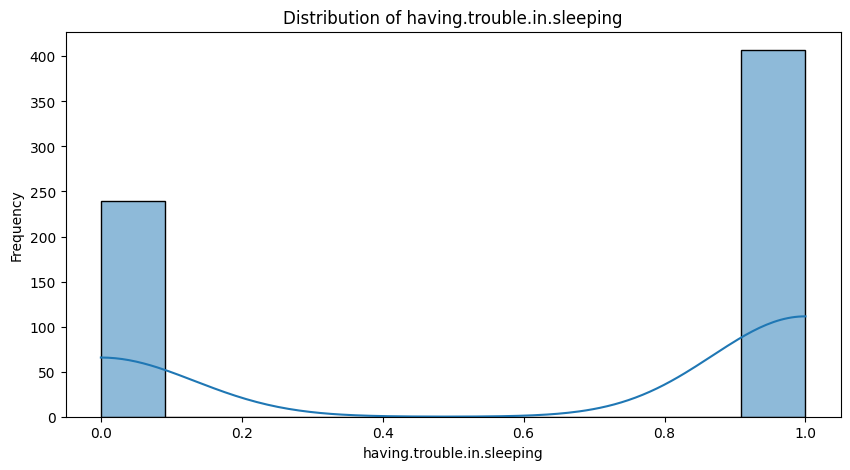

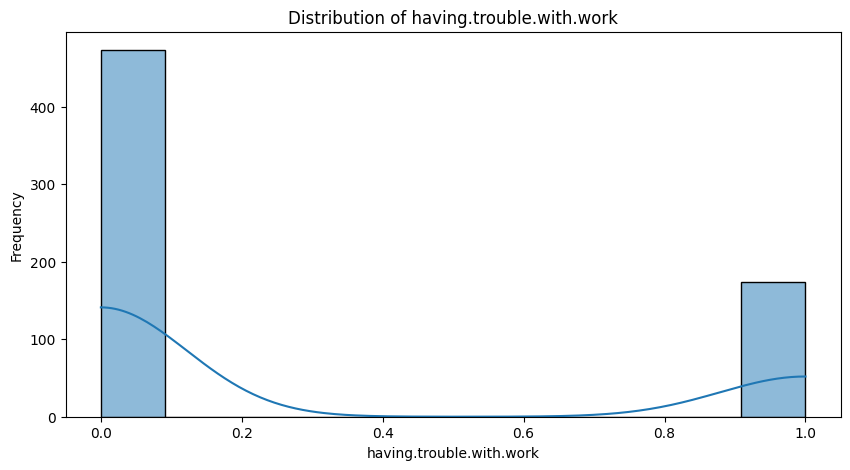

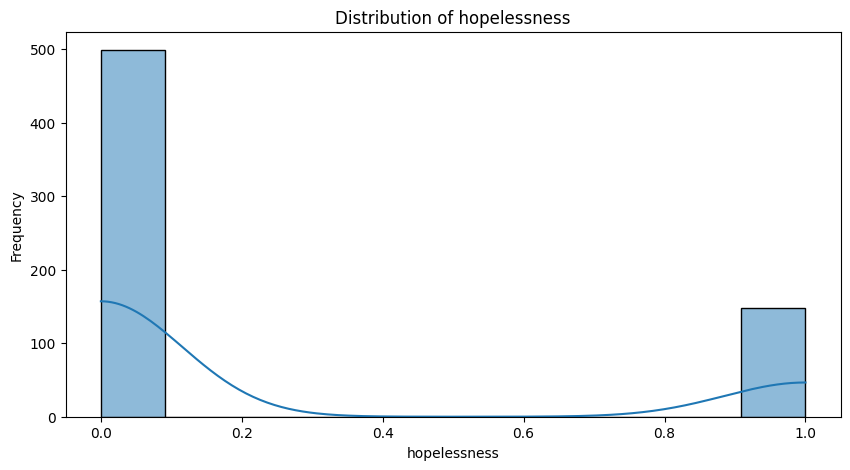

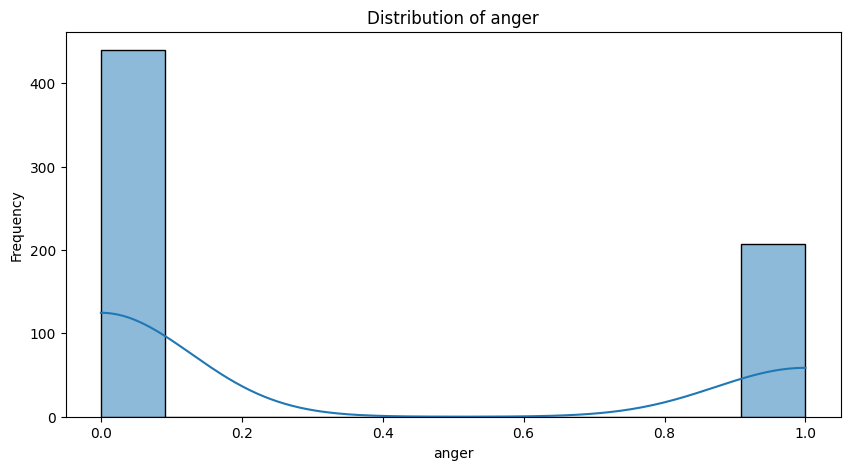

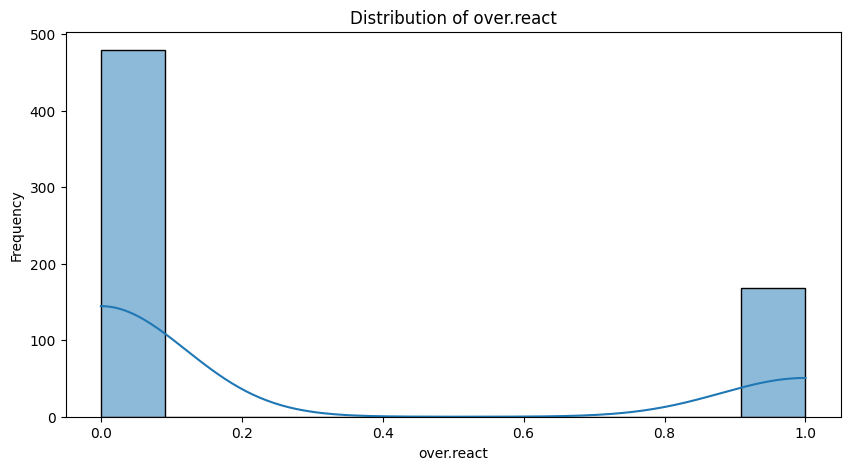

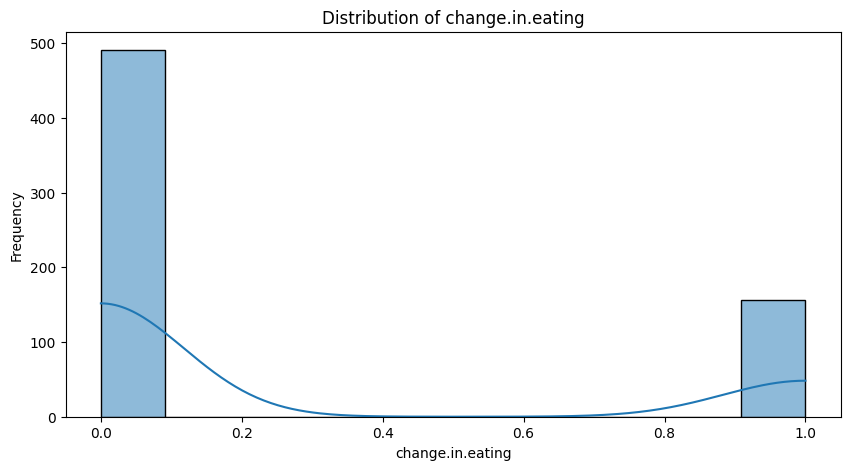

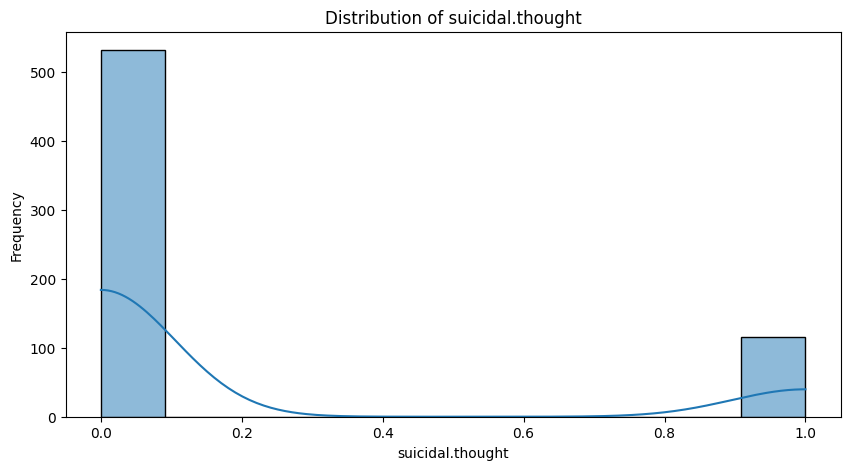

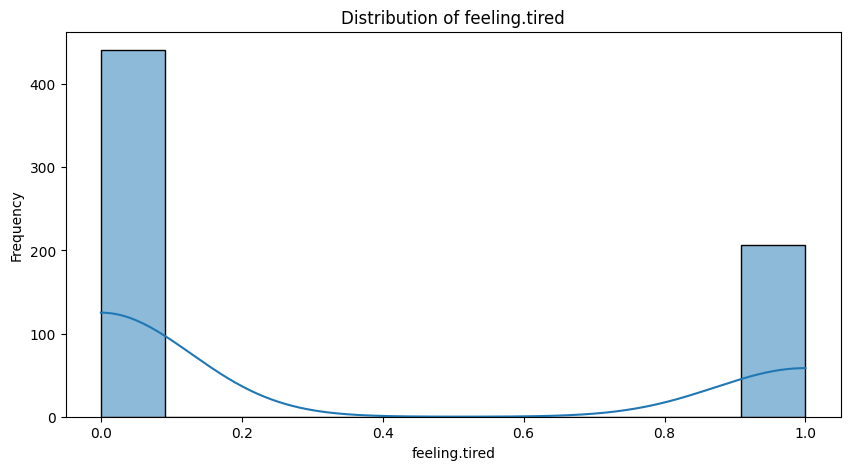

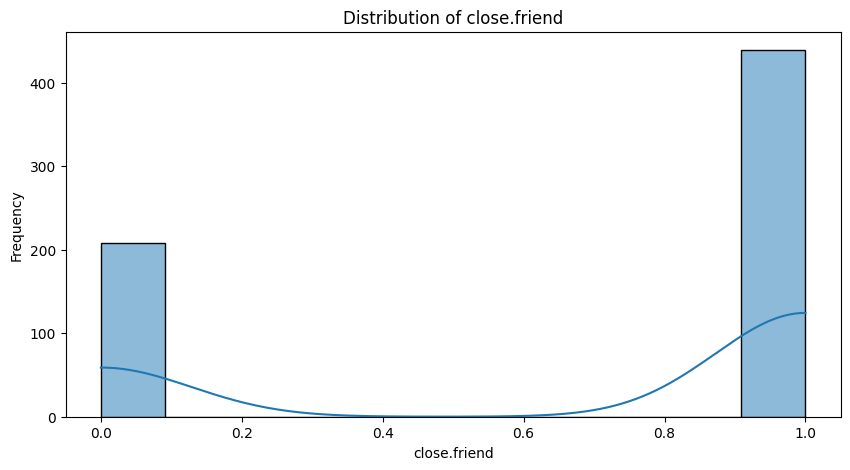

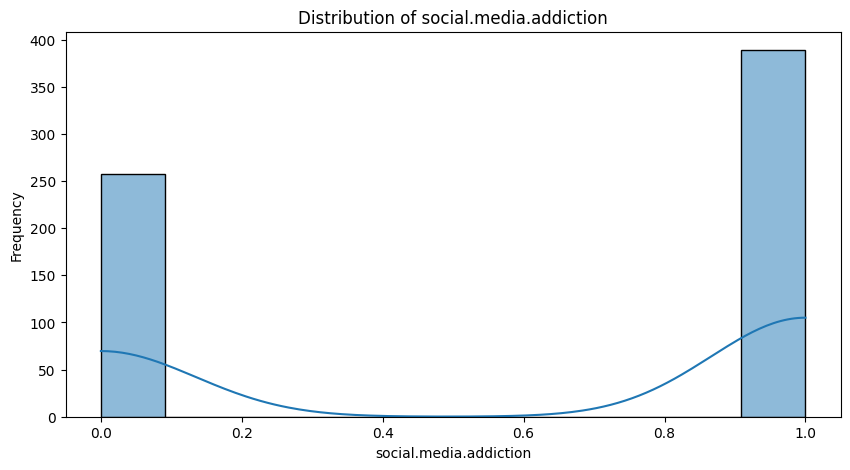

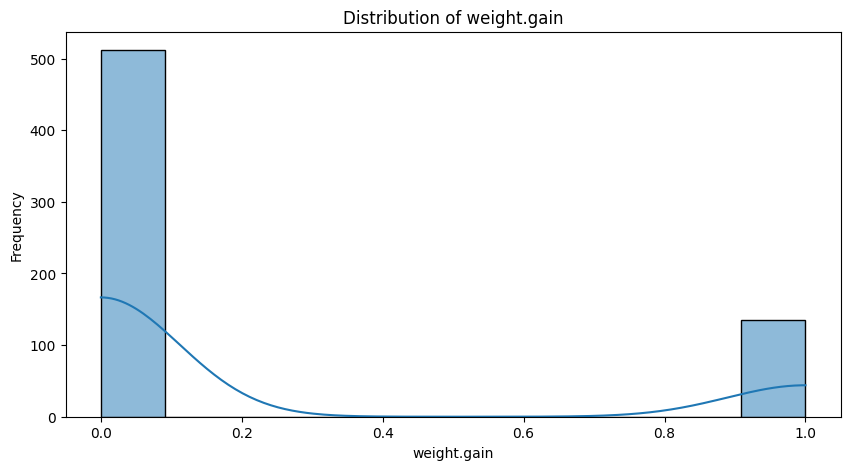

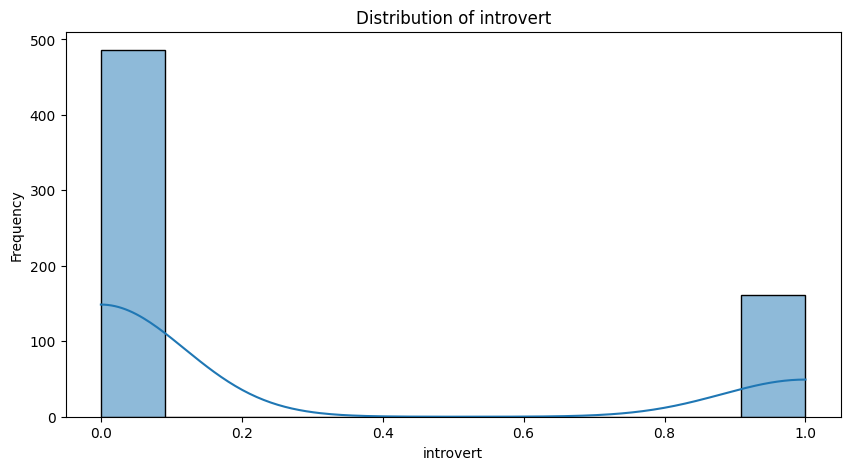

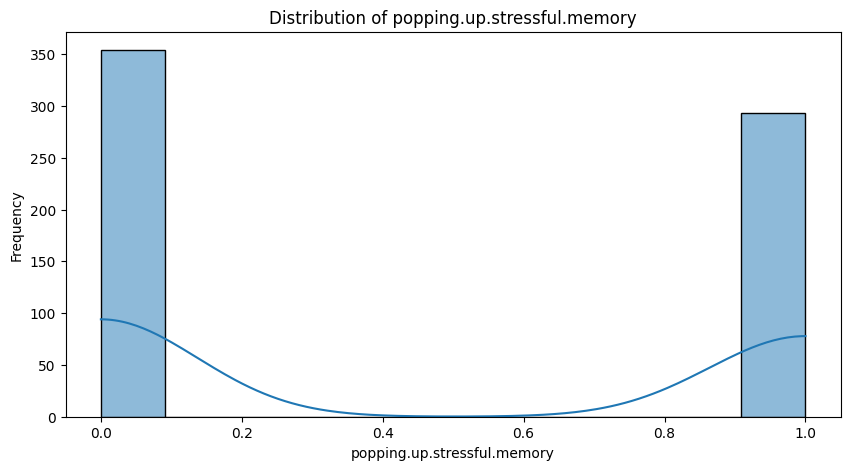

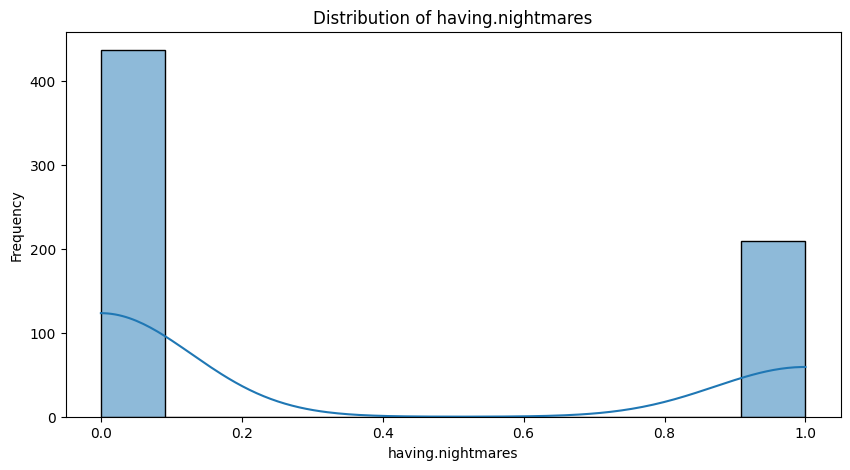

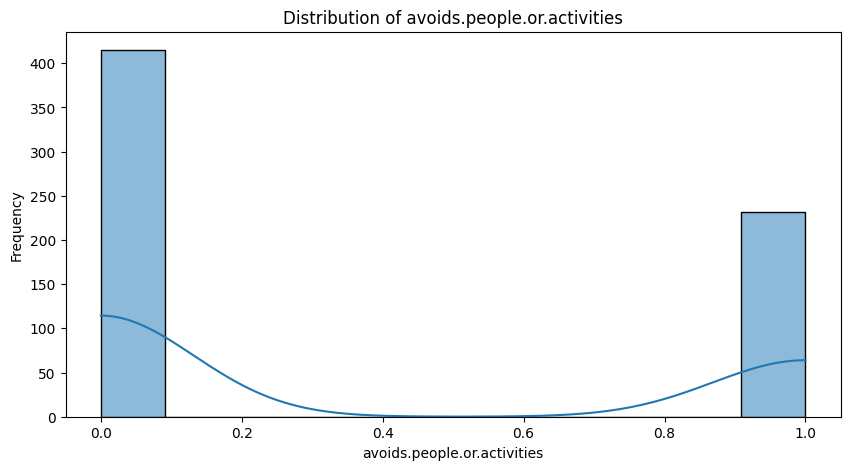

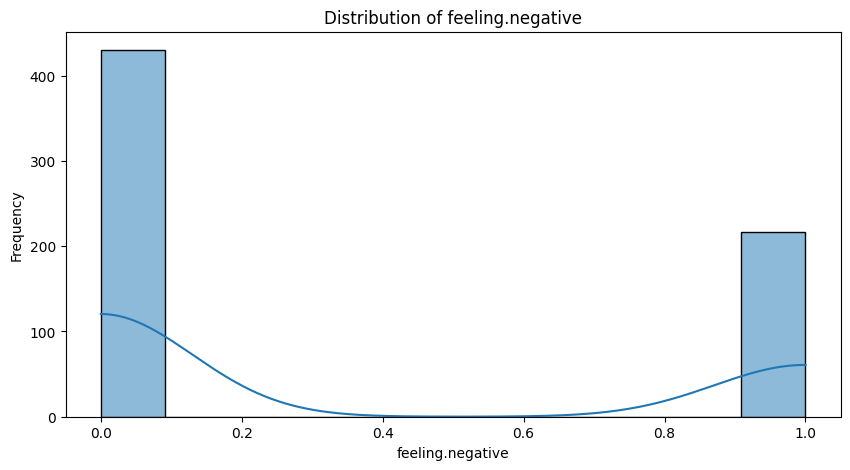

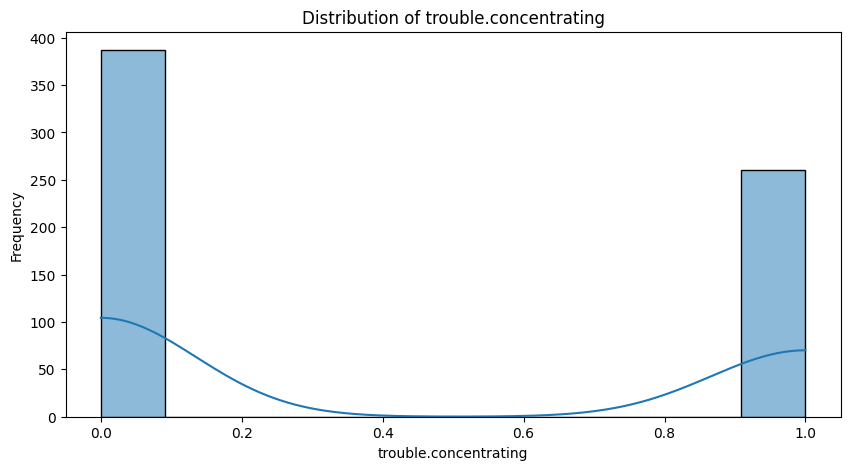

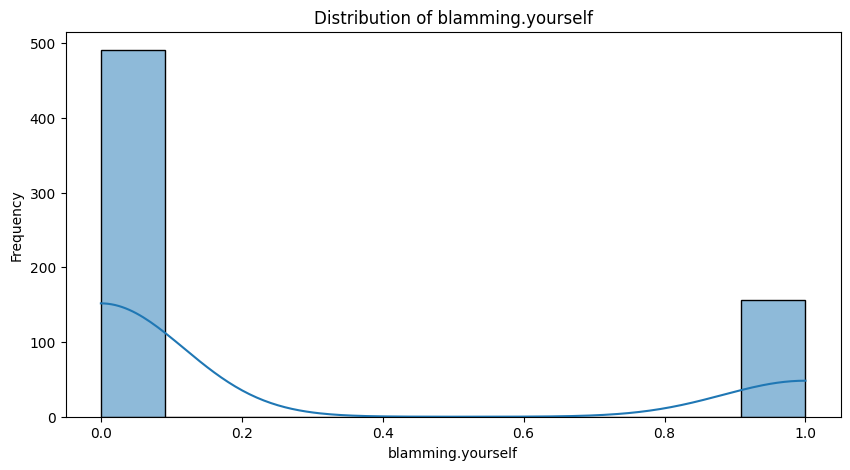

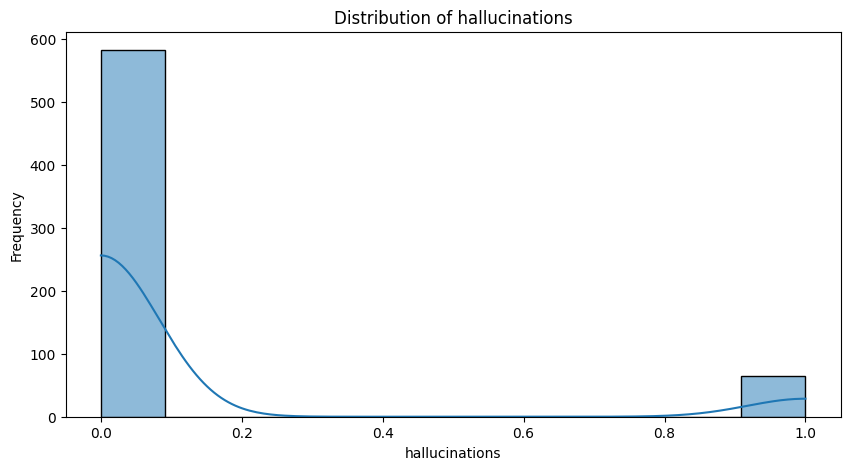

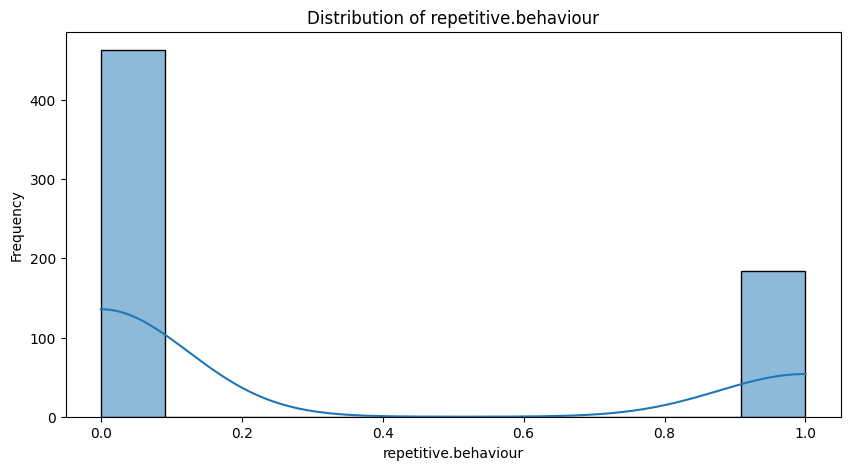

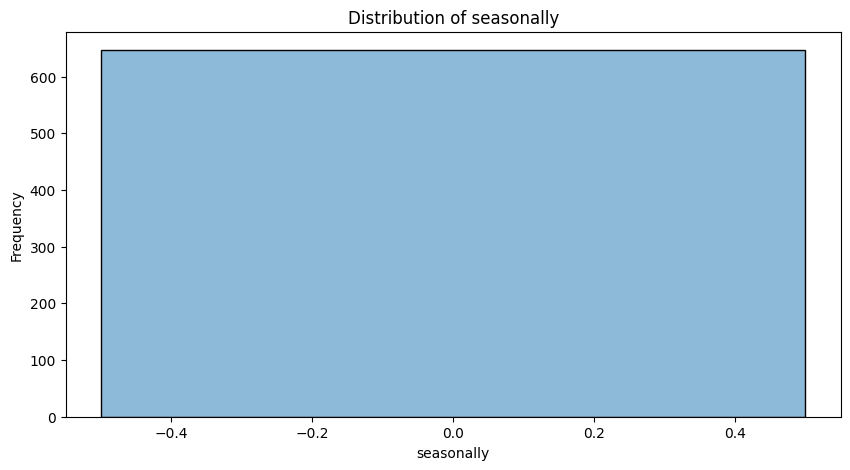

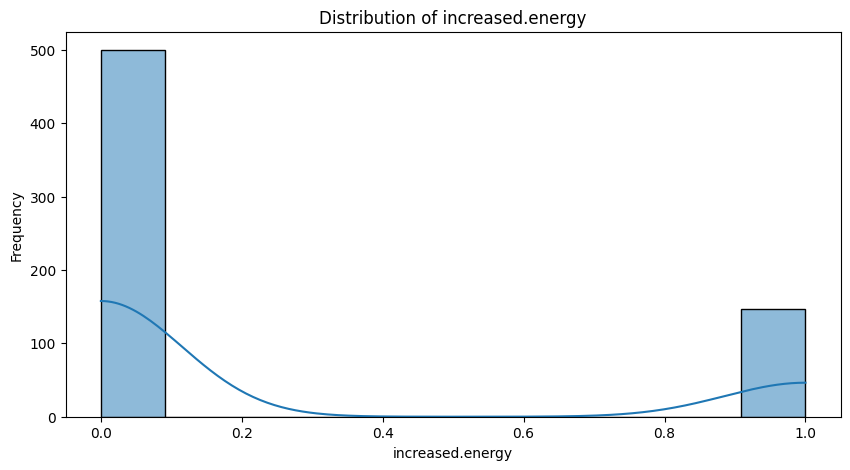

In [ ]:
# Visualisasi distribusi setiap fitur
features = df.columns[:-1]  # Semua kolom kecuali kolom 'Disorder'

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## **PREPROCESSING**

**MENGUBAH NAMA KOLOM**

In [ ]:
# Dictionary untuk rename kolom
rename_dict = {
    'ag+1:629e' : 'age',
    'feeling.nervous': 'nervous',
    'panic': 'panic',
    'breathing.rapidly': 'rapid_breathing',
    'sweating': 'sweating',
    'trouble.in.concentration': 'concentration_trouble',
    'having.trouble.in.sleeping': 'sleep_trouble',
    'having.trouble.with.work': 'work_trouble',
    'hopelessness': 'hopelessness',
    'anger': 'anger',
    'over.react': 'over_react',
    'change.in.eating': 'eating_change',
    'suicidal.thought': 'suicidal_thought',
    'feeling.tired': 'tired',
    'close.friend': 'close_friend',
    'social.media.addiction': 'social_media_addiction',
    'weight.gain': 'weight_gain',
    'introvert': 'introvert',
    'popping.up.stressful.memory': 'stressful_memory',
    'having.nightmares': 'nightmares',
    'avoids.people.or.activities': 'avoids_people_activities',
    'feeling.negative': 'negative_feeling',
    'trouble.concentrating': 'trouble_concentrating',
    'blamming.yourself': 'self_blaming',
    'hallucinations': 'hallucinations',
    'repetitive.behaviour': 'repetitive_behaviour',
    'increased.energy': 'increased_energy',
    'Disorder': 'disorder'
}

# Menggunakan rename untuk mengganti nama kolom
df.rename(columns=rename_dict, inplace=True)

# Menampilkan DataFrame yang sudah diubah namanya
df.head()

,age,nervous,panic,rapid_breathing,sweating,concentration_trouble,sleep_trouble,work_trouble,hopelessness,anger,...,nightmares,avoids_people_activities,negative_feeling,trouble_concentrating,self_blaming,hallucinations,repetitive_behaviour,seasonally,increased_energy,disorder
0,0,0,1,0,1,0,1,1,1,1,...,1,0,1,1,0,0,0,0,0,MDD
1,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,MDD
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,OCD
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,OCD
4,1,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,ASD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       647 non-null    int64 
 1   nervous                   647 non-null    int64 
 2   panic                     647 non-null    int64 
 3   rapid_breathing           647 non-null    int64 
 4   sweating                  647 non-null    int64 
 5   concentration_trouble     647 non-null    int64 
 6   sleep_trouble             647 non-null    int64 
 7   work_trouble              647 non-null    int64 
 8   hopelessness              647 non-null    int64 
 9   anger                     647 non-null    int64 
 10  over_react                647 non-null    int64 
 11  eating_change             647 non-null    int64 
 12  suicidal_thought          647 non-null    int64 
 13  tired                     647 non-null    int64 
 14  close_friend              

**MENGHITUNG DISTRIBUSI KELAS KOLOM TARGET**

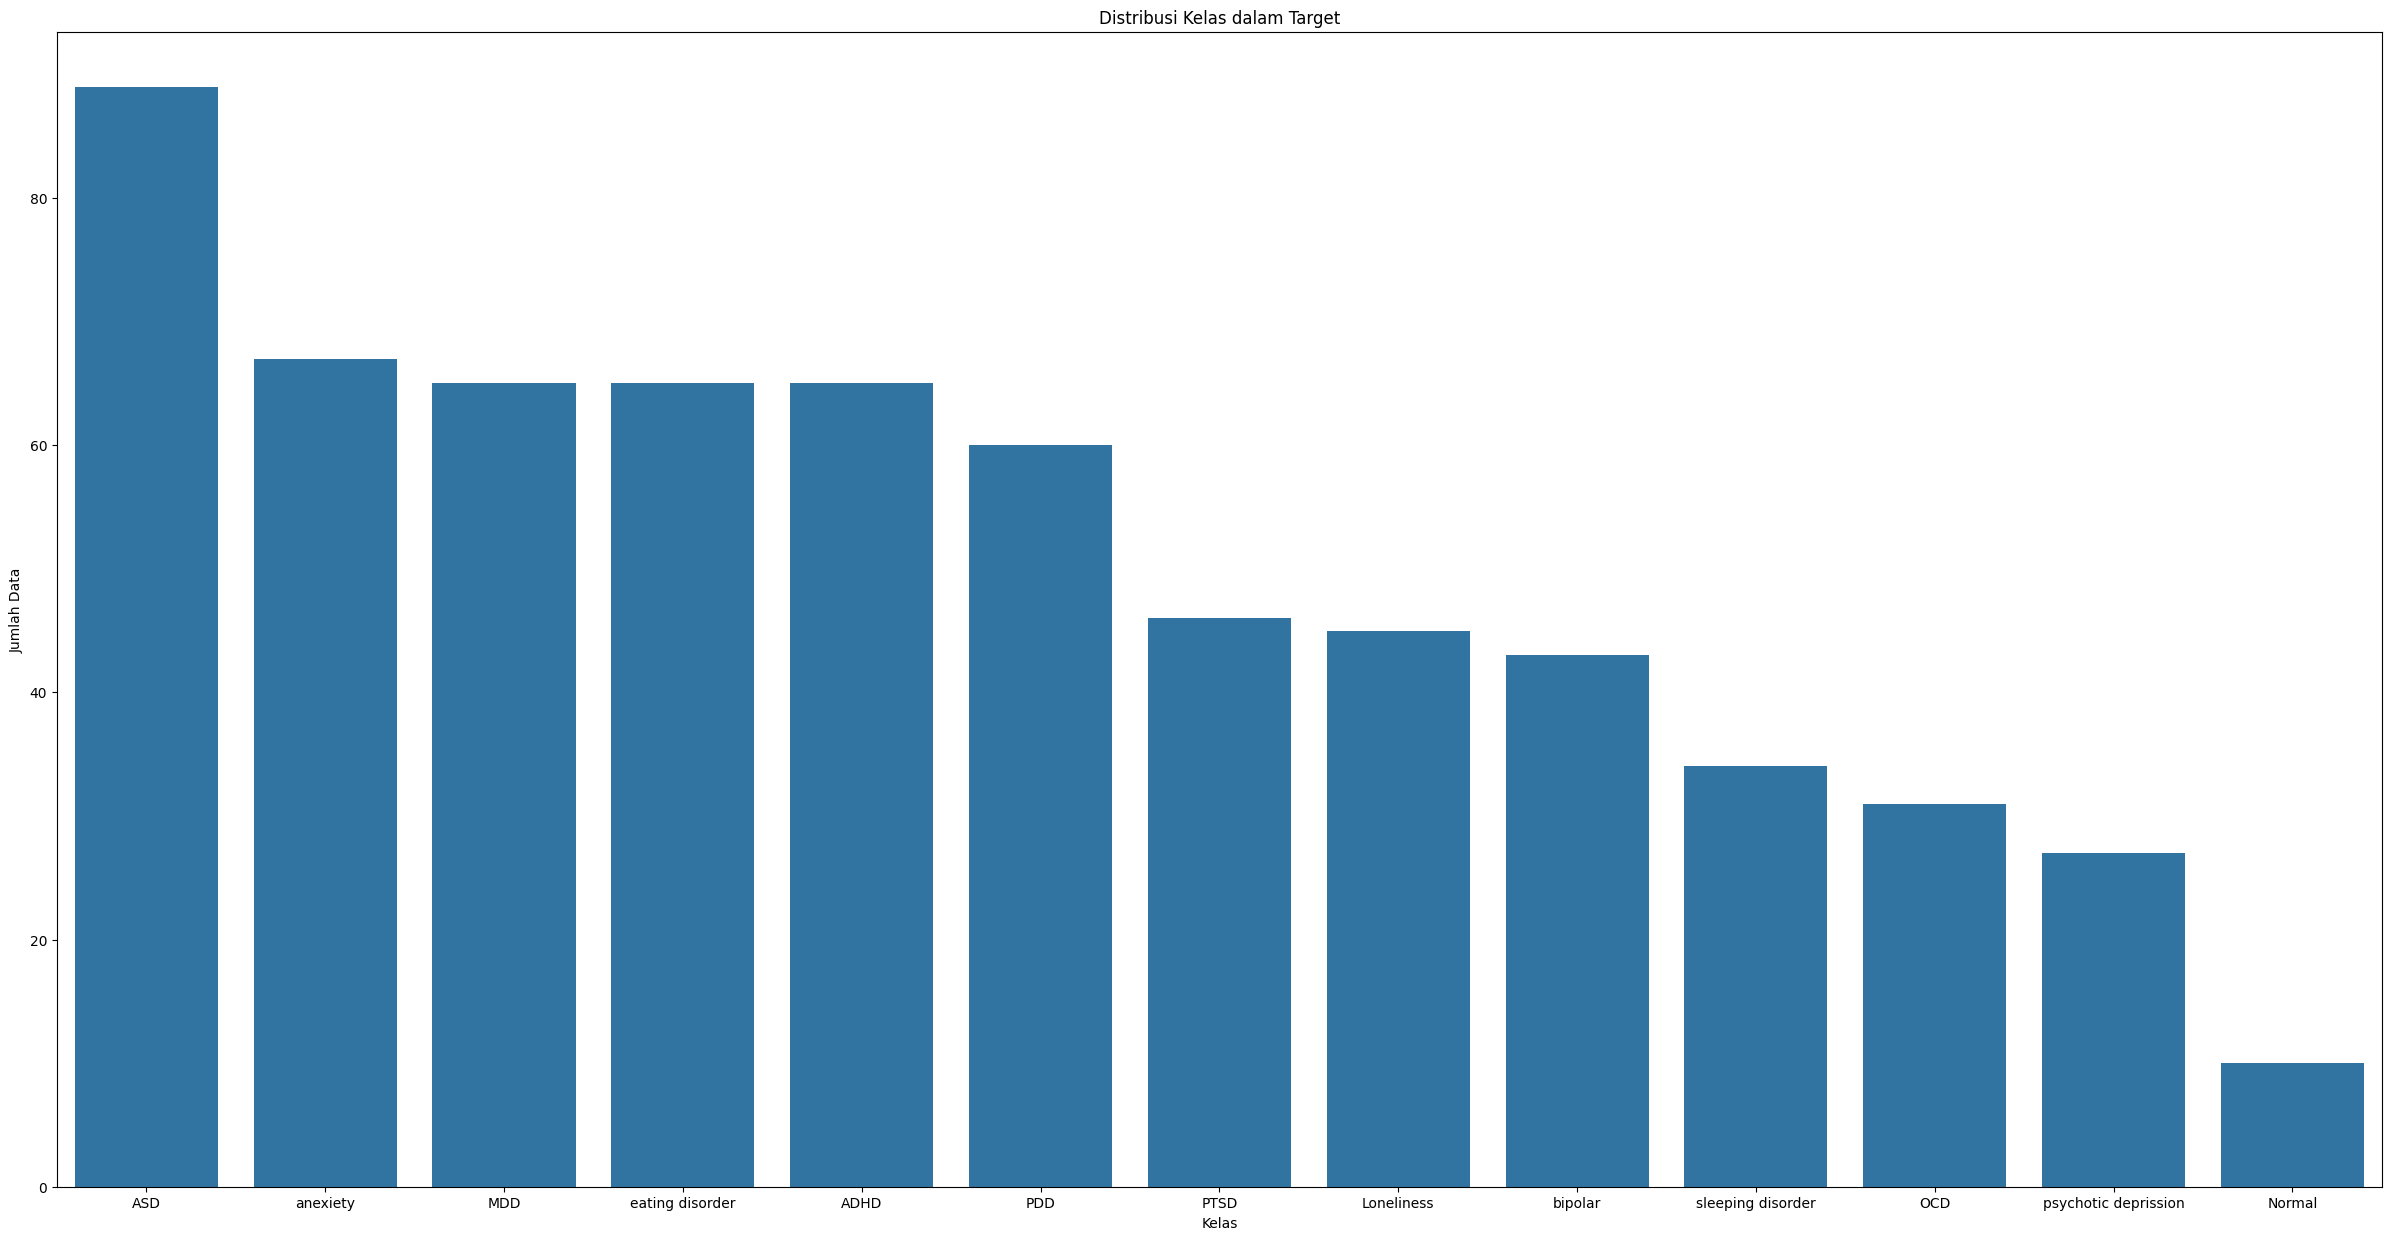

In [ ]:
# Menghitung jumlah data untuk setiap kelas dalam target
class_counts = df['disorder'].value_counts()

# Menggambar bar plot menggunakan seaborn
plt.figure(figsize=(30, 15))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribusi Kelas dalam Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
# Menghilangkan baris dengan nilai kolom 'Disorder' adalah 'psychotic depression'
df = df[df['disorder'] != 'psychotic deprission']

# Melakukan reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,age,nervous,panic,rapid_breathing,sweating,concentration_trouble,sleep_trouble,work_trouble,hopelessness,anger,...,nightmares,avoids_people_activities,negative_feeling,trouble_concentrating,self_blaming,hallucinations,repetitive_behaviour,seasonally,increased_energy,disorder
0,0,0,1,0,1,0,1,1,1,1,...,1,0,1,1,0,0,0,0,0,MDD
1,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,MDD
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,OCD
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,OCD
4,1,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,ADHD
616,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,OCD
617,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,sleeping disorder
618,0,0,1,0,1,0,1,1,1,1,...,1,0,1,1,0,0,0,0,0,MDD


**OVER SAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop(['disorder'], axis=1)
y = df[['disorder']]

# Melakukan oversampling pada setiap target secara terpisah
smote = SMOTE()

# Untuk setiap kolom target, lakukan oversampling dan gabungkan hasilnya
X_oversampled = []
y_oversampled = pd.DataFrame()

for column in y.columns:
    X_res, y_res = smote.fit_resample(X, y[column])
    X_oversampled.append(X_res)
    y_oversampled[column] = y_res

# Gabungkan kembali fitur yang sudah di-oversample
X_oversampled = pd.concat(X_oversampled, axis=0)
y_oversampled.reset_index(drop=True, inplace=True)

# Gabungkan fitur dan target yang telah di-oversample
df = pd.concat([X_oversampled, y_oversampled], axis=1)

# Menampilkan ukuran data asli dan hasil oversampling
print("Original data shape:", df.shape)
print("Oversampled data shape:", df.shape)

Original data shape: (1068, 29)
Oversampled data shape: (1068, 29)


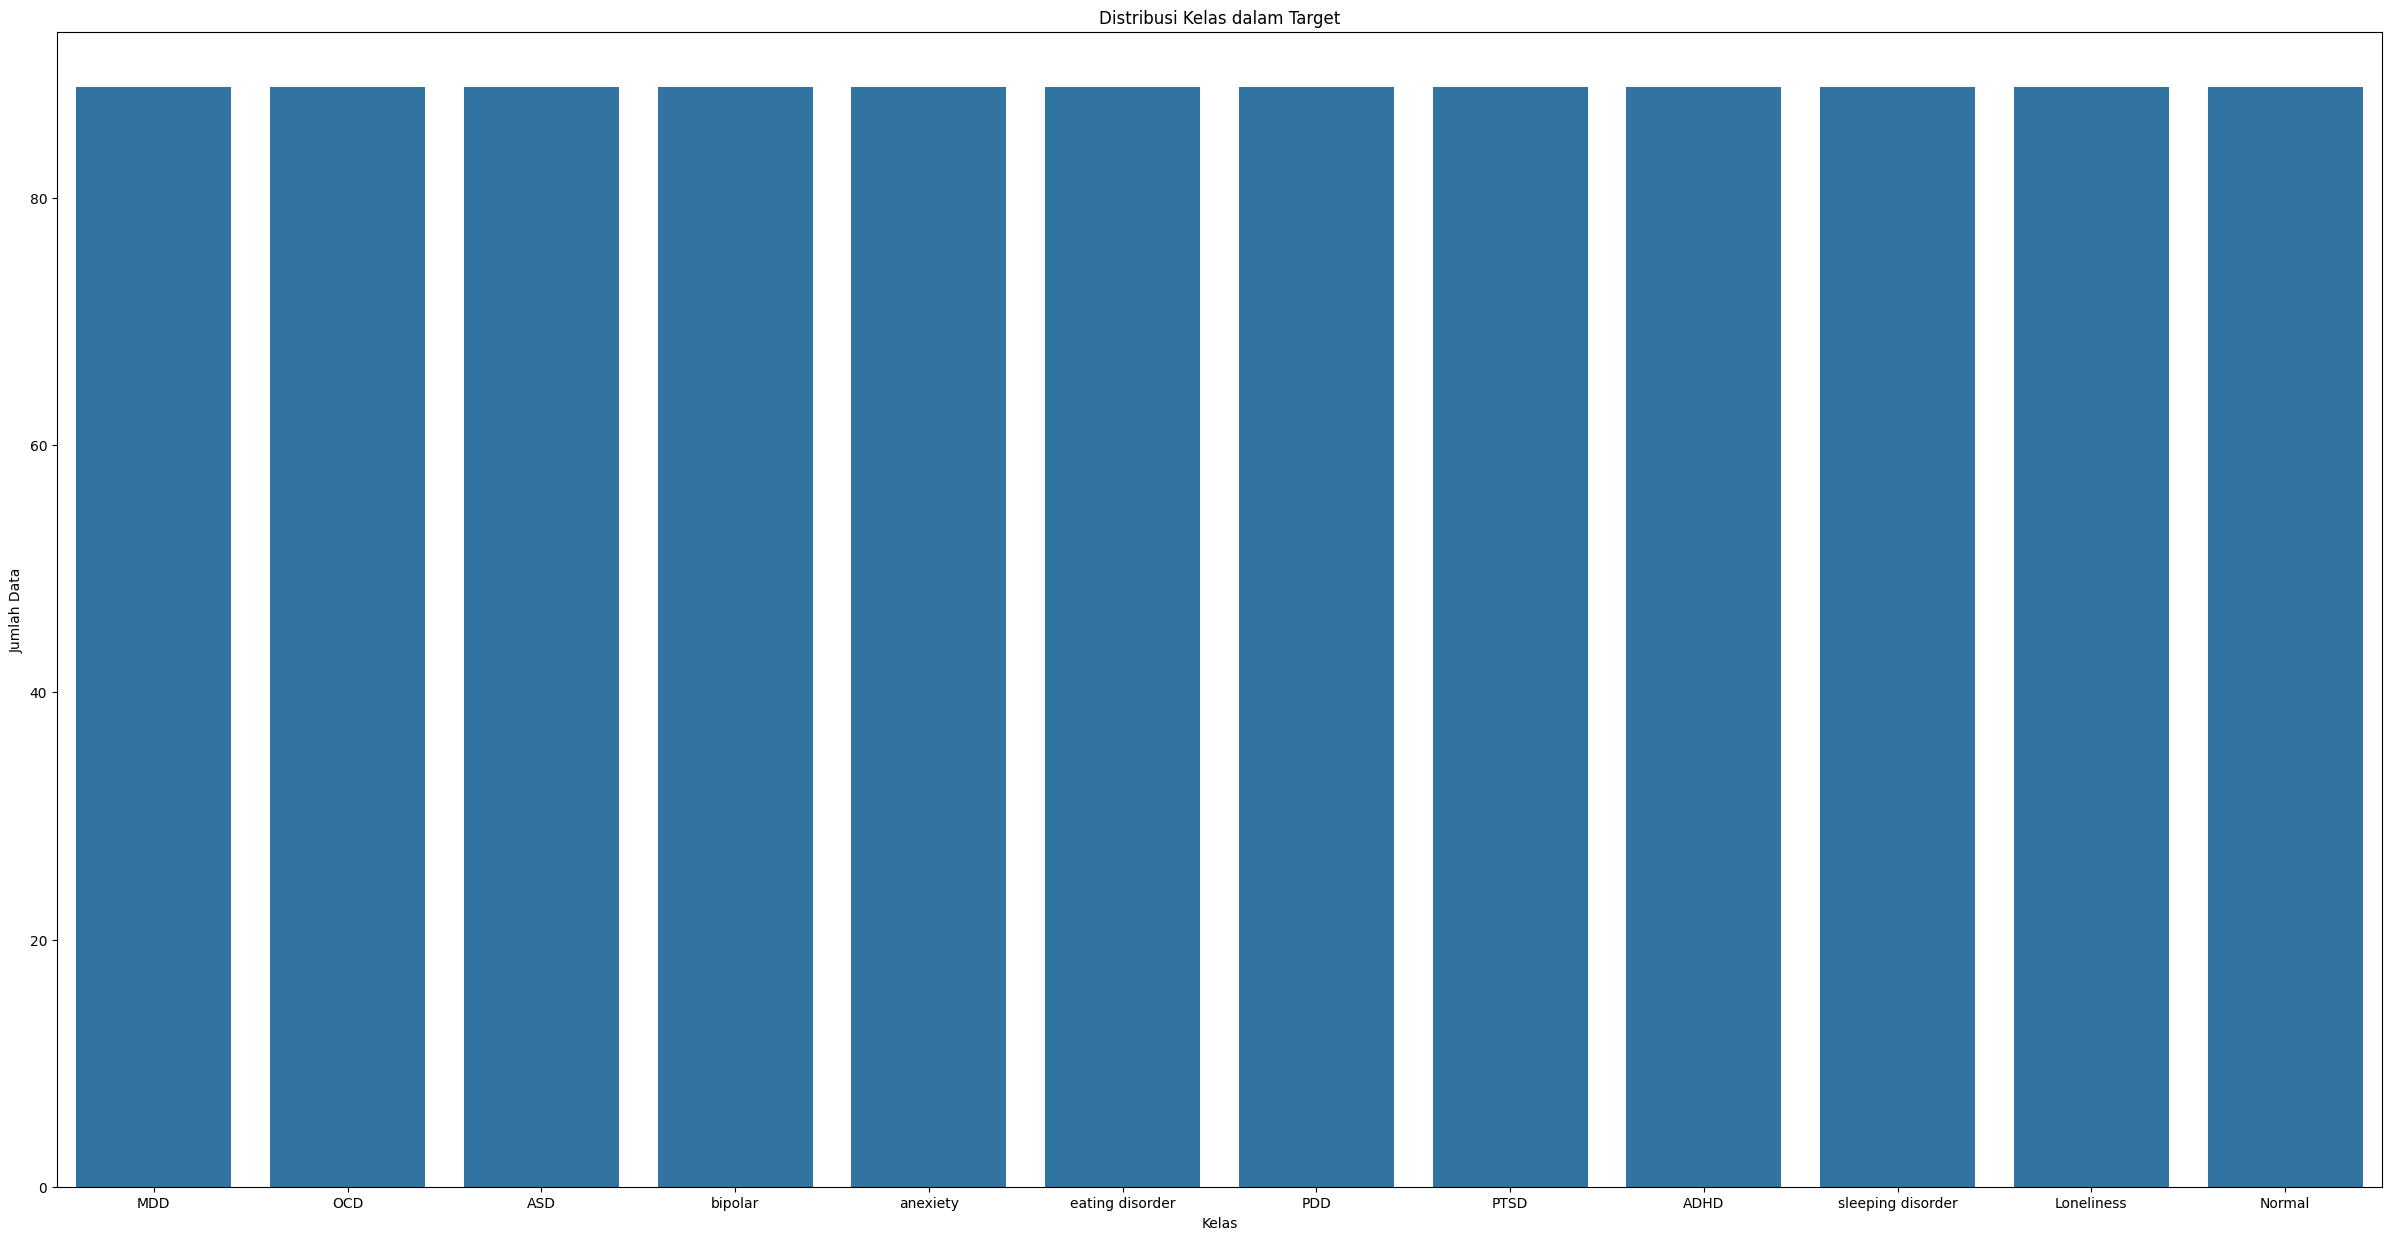

In [ ]:
# Hitung jumlah data untuk setiap kelas dalam target
class_counts = df['disorder'].value_counts()

# Menggambar bar plot menggunakan seaborn
plt.figure(figsize=(30, 15))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribusi Kelas dalam Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.show()

**MENGHITUNG KORELASI ANTAR KOLOM**

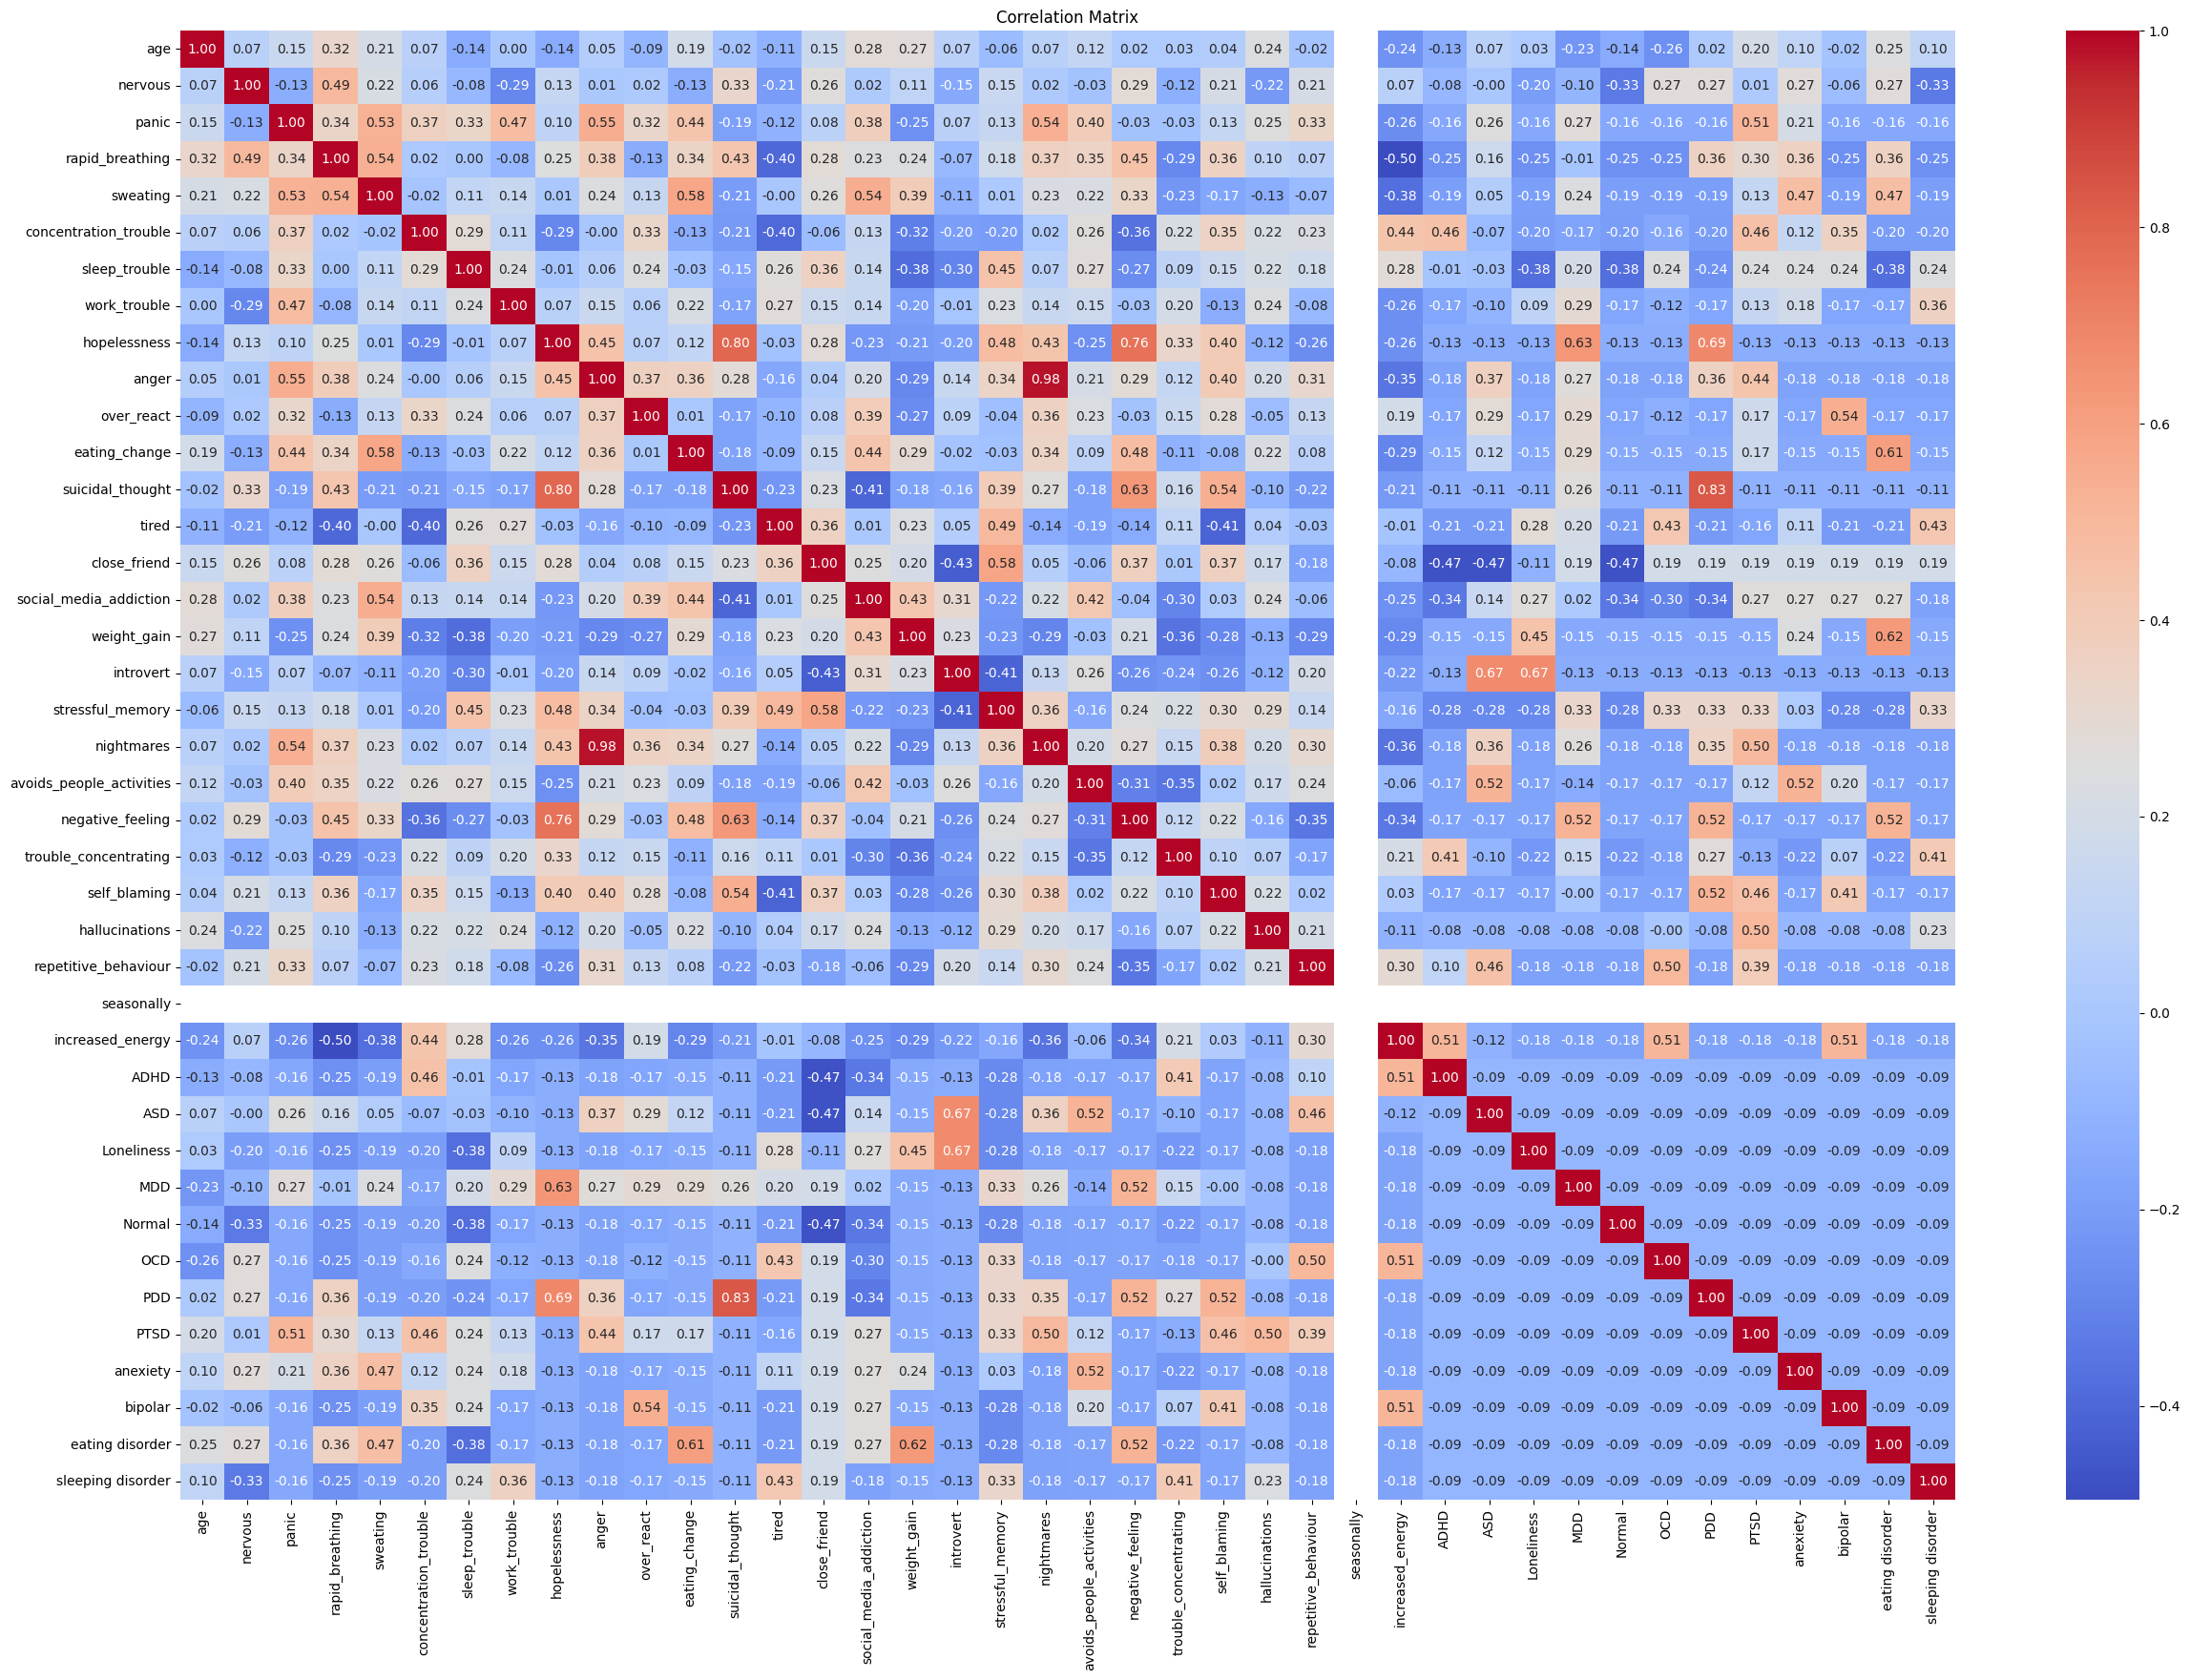

In [ ]:
# Membuat variabel baru dari dataset df
df_corr = df.copy()

# Lakukan one-hot encoding pada kolom Disorder
one_hot_encoded = df_corr['disorder'].str.get_dummies()

# Gabungkan hasil one-hot encoding dengan DataFrame asli
df_corr = pd.concat([df_corr, one_hot_encoded], axis=1)

# Hapus kolom Disorder jika tidak diperlukan lagi
df_corr.drop(columns=['disorder'], inplace=True)

# 3. Membuat Heatmap Korelasi
plt.figure(figsize=(30, 20))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**FEATURE SELECTION**

Mengambil kolom yang memiliki korelasi terhadap kolom target sebanyak lebih dari 40%

In [ ]:
# Menghapus kolom yang tidak diperlukan
df = df[['age', 'panic', 'sweating', 'concentration_trouble', 'work_trouble', 'hopelessness', 'anger', 'over_react', 'eating_change', 'suicidal_thought', 'tired', 'weight_gain', 'introvert', 'nightmares', 'avoids_people_activities', 'negative_feeling', 'self_blaming', 'hallucinations', 'repetitive_behaviour', 'increased_energy', 'disorder']]
df

,age,panic,sweating,concentration_trouble,work_trouble,hopelessness,anger,over_react,eating_change,suicidal_thought,...,weight_gain,introvert,nightmares,avoids_people_activities,negative_feeling,self_blaming,hallucinations,repetitive_behaviour,increased_energy,disorder
0,0,1,1,0,1,1,1,1,1,0,...,0,0,1,0,1,0,0,0,0,MDD
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,MDD
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,OCD
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,OCD
4,1,0,0,0,0,0,1,1,0,0,...,0,1,1,1,0,0,0,0,0,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sleeping disorder
1064,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sleeping disorder
1065,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sleeping disorder
1066,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,sleeping disorder


**NORMALISASI DATA**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat instance dari LabelEncoder
label_encoder = LabelEncoder()

# Melakukan fit dan transformasi pada kolom kategori
df['disorder'] = label_encoder.fit_transform(df['disorder'])

# Menyimpan mapping dari nilai awal ke nilai encoded
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nMapping Nilai Awal ke Nilai Encoded:")
print(label_mapping)

df


Mapping Nilai Awal ke Nilai Encoded:
{'ADHD': 0, 'ASD': 1, 'Loneliness': 2, 'MDD': 3, 'Normal': 4, 'OCD': 5, 'PDD': 6, 'PTSD': 7, 'anexiety': 8, 'bipolar': 9, 'eating disorder': 10, 'sleeping disorder': 11}


,age,panic,sweating,concentration_trouble,work_trouble,hopelessness,anger,over_react,eating_change,suicidal_thought,...,weight_gain,introvert,nightmares,avoids_people_activities,negative_feeling,self_blaming,hallucinations,repetitive_behaviour,increased_energy,disorder
0,0,1,1,0,1,1,1,1,1,0,...,0,0,1,0,1,0,0,0,0,3
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,5
4,1,0,0,0,0,0,1,1,0,0,...,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1064,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1065,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1066,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,11


**SPLIT TRAIN & TEST DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan Fitur dan target
X = df.drop(['disorder'], axis=1)
y = df['disorder']

# membagi Data ke Dalam Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head(20)

,age,panic,sweating,concentration_trouble,work_trouble,hopelessness,anger,over_react,eating_change,suicidal_thought,tired,weight_gain,introvert,nightmares,avoids_people_activities,negative_feeling,self_blaming,hallucinations,repetitive_behaviour,increased_energy
0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
6,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
9,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [ ]:
y

0        3
1        3
2        5
3        5
4        1
        ..
1063    11
1064    11
1065    11
1066    11
1067    11
Name: disorder, Length: 1068, dtype: int64

In [ ]:
# Menghapus duplikasi berdasarkan kolom 'label'
df_unique_label = df.drop_duplicates(subset=['disorder'])

df_unique_label

,age,panic,sweating,concentration_trouble,work_trouble,hopelessness,anger,over_react,eating_change,suicidal_thought,...,weight_gain,introvert,nightmares,avoids_people_activities,negative_feeling,self_blaming,hallucinations,repetitive_behaviour,increased_energy,disorder
0,0,1,1,0,1,1,1,1,1,0,...,0,0,1,0,1,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,5
4,1,0,0,0,0,0,1,1,0,0,...,0,1,1,1,0,0,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,9
6,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,8
7,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,10
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,6
11,1,1,0,1,1,0,1,0,1,0,...,0,0,1,1,0,1,1,1,0,7
13,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


## **BUILD MODEL**

### **MELATIH MODEL DASAR KLASIFIKASI**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Membuat dan melatih model SVM
svm_model = SVC(C=1, kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Membuat dan melatih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Membuat dan melatih model MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Classification Report")
print(classification_report(y_test, y_pred_mlp))
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=20)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Membuat dan melatih model Logistic Regression
lr_model = LogisticRegression(C=1, solver='lbfgs', max_iter=300)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

SVM Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        17
           3       0.81      1.00      0.89        17
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        19
           6       1.00      0.69      0.82        13
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        18

    accuracy                           0.98       231
   macro avg       0.99      0.98      0.98       231
weighted avg       0.99      0.98      0.98       231

SVM Accuracy: 0.9826839826839827
KNN Classification R

**MELATIH MODEL ENSAMBLE LEARNING SOFT VOTTING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Bagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan model dengan hyperparameter yang telah dipilih
svm_model = SVC(C=1, kernel='rbf', probability=True)
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300)
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=20)
lr_model = LogisticRegression(C=1, solver='lbfgs', max_iter=300)

# Buat Voting Classifier dengan model yang telah didefinisikan
voting_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('knn', knn_model),
    ('mlp', mlp_model),
    ('dt', dt_model),
    ('lr', lr_model)
], voting='soft')

# Latih Voting Classifier pada training data
voting_model.fit(X_train, y_train)

# Memprediksi dengan Voting Classifier pada testing data
y_pred = voting_model.predict(X_test)

# Evaluasi hasil
print("Classification Report untuk Voting Classifier:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report untuk Voting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        16
           3       0.90      1.00      0.95        19
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        19
           6       1.00      0.89      0.94        18
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        20

    accuracy                           0.99       232
   macro avg       0.99      0.99      0.99       232
weighted avg       0.99      0.99      0.99       232

Accuracy: 0.9913793103448276


**K-FOLD CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Inisialisasi KFold dengan K=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan skor akurasi dari setiap fold
scores = []

# Iterasi melalui setiap fold
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Melatih Voting Classifier pada data latih
    voting_model.fit(X_train, y_train)

    # Memprediksi dengan Voting Classifier pada data uji
    y_pred = voting_model.predict(X_test)

    # Hitung skor akurasi
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

    # Tampilkan hasil dari setiap fold
    print(f"Classification Report untuk fold {i+1}:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy)
    print()

# Tampilkan rata-rata akurasi dari semua fold
print("Rata-rata akurasi dari K-fold Cross Validation:", np.mean(scores))

Classification Report untuk fold 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        16
           3       0.90      1.00      0.95        19
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        19
           6       1.00      0.89      0.94        18
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        20

    accuracy                           0.99       232
   macro avg       0.99      0.99      0.99       232
weighted avg       0.99      0.99      0.99       232

Accuracy: 0.9913793103448276

Classificatio

**EXPORT MODEL KE FORMAT .PKL**

In [ ]:
import joblib

# Simpan model menggunakan joblib
joblib.dump(voting_model, 'model.pkl')

# Muat model VotingClassifier dari file .pkl
loaded_model = joblib.load('model.pkl')

In [ ]:
voting_model

VotingClassifier(estimators=[('svm', SVC(C=1, probability=True)),
                             ('knn', KNeighborsClassifier()),
                             ('mlp', MLPClassifier(max_iter=300)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=20)),
                             ('lr', LogisticRegression(C=1, max_iter=300))],
                 voting='soft')

**PENGUJIAN MODEL**

In [ ]:
import pandas as pd
import joblib

# Load the saved model
with open('model.pkl', 'rb') as f:
    model = joblib.load(f)

# Function to manually input data for prediction
def input_manual():
    new_data = {}
    print("Berikan jawaban dengan memberikan nilai (0 = tidak, 1 = ya):")
    new_data['age'] = int(input("Apakah Anda Berusia di atas 20 tahun? (0 = tidak, 1 = ya): "))
    new_data['panic'] = int(input("Apakah Anda sering merasa panik saat menghadapi masalah perkuliahan? (0 = tidak, 1 = ya): "))
    new_data['sweating'] = int(input("Apakah Anda sering merasa berkeringat berlebihan saat belajar, ujian atau presentasi? (0 = tidak, 1 = ya): "))
    new_data['concentration_trouble'] = int(input("Apakah Anda sering mengalami kesulitan berkonsentrasi saat belajar? (0 = tidak, 1 = ya): "))
    new_data['work_trouble'] = int(input("Apakah Anda mengalami kesulitan dalam belajar? (0 = tidak, 1 = ya): "))
    new_data['hopelessness'] = int(input("Apakah Anda sering merasa putus asa terhadap hasil ujian atau nilai akademis? (0 = tidak, 1 = ya): "))
    new_data['anger'] = int(input("Apakah Anda sering merasa marah atau frustrasi saat belajar? (0 = tidak, 1 = ya): "))
    new_data['over_react'] = int(input("Apakah Anda merasa bereaksi berlebihan terhadap masalah kecil dalam kehidupan kuliah? (0 = tidak, 1 = ya): "))
    new_data['eating_change'] = int(input("Apakah Anda mengalami perubahan dalam pola makan selama masa kuliah? (0 = tidak, 1 = ya): "))
    new_data['suicidal_thought'] = int(input("Apakah Anda pernah memiliki pikiran untuk menyerah saat merasa tertekan oleh kuliah? (0 = tidak, 1 = ya): "))
    new_data['tired'] = int(input("Apakah Anda sering merasa kelelahan atau kehabisan energi selama perkuliahan? (0 = tidak, 1 = ya): "))
    new_data['weight_gain'] = int(input("Apakah Anda mengalami peningkatan berat badan yang tidak diinginkan selama kuliah? (0 = tidak, 1 = ya): "))
    new_data['introvert'] = int(input("Apakah Anda merasa cenderung menjadi lebih introvert selama berkuliah? (0 = tidak, 1 = ya): "))
    new_data['nightmares'] = int(input("Apakah Anda sering mengalami mimpi buruk terkait stress akademik? (0 = tidak, 1 = ya): "))
    new_data['avoids_people_activities'] = int(input("Apakah Anda cenderung menghindari interaksi sosial atau aktivitas kampus? (0 = tidak, 1 = ya): "))
    new_data['negative_feeling'] = int(input("Apakah Anda sering merasa terbebani oleh perasaan negatif terkait akademik? (0 = tidak, 1 = ya): "))
    new_data['self_blaming'] = int(input("Apakah Anda sering menyalahkan diri sendiri ketika ada kesalahan dalam perkuliahan? (0 = tidak, 1 = ya): "))
    new_data['hallucinations'] = int(input("Apakah Anda pernah mengalami halusinasi atau pikiran yang tidak wajar terkait tekanan akademik? (0 = tidak, 1 = ya): "))
    new_data['repetitive_behaviour'] = int(input("Apakah Anda melakukan sesuatu berulang-ulang sebagai respons terhadap stres kuliah? (0 = tidak, 1 = ya): "))
    new_data['increased_energy'] = int(input("Apakah Anda mengalami peningkatan energi yang tidak biasa yang mungkin terkait dengan tekanan akademik? (0 = tidak, 1 = ya): "))

    return new_data

# Input manual data
new_data = input_manual()

# Convert data to DataFrame
new_data_df = pd.DataFrame([new_data])

# Mapping kelas sebelum encoding ke nilai yang lebih mudah dipahami
class_mapping = {
    0: 'ADHD',
    1: 'ASD',
    2: 'Loneliness',
    3: 'MDD',
    4: 'Normal',
    5: 'OCD',
    6: 'PDD',
    7: 'PTSD',
    8: 'anexiety',
    9: 'bipolar',
    10: 'eating disorder',
    11: 'psychotic deprission',
    12: 'sleeping disorder'
}


# Melakukan prediksi menggunakan model
prediction = model.predict(new_data_df)

# Menampilkan hasil prediksi
print("\nHasil Prediksi:")
print(f"Prediksi: {class_mapping[prediction[0]]}")

Berikan jawaban dengan memberikan nilai (0 = tidak, 1 = ya):
Apakah Anda Berusia di atas 20 tahun? (0 = tidak, 1 = ya): 0
Apakah Anda sering merasa panik saat menghadapi masalah perkuliahan? (0 = tidak, 1 = ya): 0
Apakah Anda sering merasa berkeringat berlebihan saat belajar, ujian atau presentasi? (0 = tidak, 1 = ya): 0
Apakah Anda sering mengalami kesulitan berkonsentrasi saat belajar? (0 = tidak, 1 = ya): 0
Apakah Anda mengalami kesulitan dalam belajar? (0 = tidak, 1 = ya): 0
Apakah Anda sering merasa putus asa terhadap hasil ujian atau nilai akademis? (0 = tidak, 1 = ya): 0
Apakah Anda sering merasa marah atau frustrasi saat belajar? (0 = tidak, 1 = ya): 0
Apakah Anda merasa bereaksi berlebihan terhadap masalah kecil dalam kehidupan kuliah? (0 = tidak, 1 = ya): 0
Apakah Anda mengalami perubahan dalam pola makan selama masa kuliah? (0 = tidak, 1 = ya): 0
Apakah Anda pernah memiliki pikiran untuk menyerah saat merasa tertekan oleh kuliah? (0 = tidak, 1 = ya): 0
Apakah Anda sering mer

# **TF**

In [ ]:
!pip install tensorflow scikit-learn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, epochs=10, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None

    def fit(self, X, y):
        self.model_ = self.build_fn()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model_.predict(X).argmax(axis=1)

    def predict_proba(self, X):
        return self.model_.predict(X)

# Define a simple MLP model in Keras
def create_mlp_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(set(y)), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Keras wrappers for scikit-learn compatibility
mlp1 = KerasClassifier(build_fn=create_mlp_model, epochs=10, batch_size=32, verbose=0)
mlp2 = KerasClassifier(build_fn=create_mlp_model, epochs=10, batch_size=32, verbose=0)
lr_model = LogisticRegression(max_iter=300)

# Voting Classifier with Keras models and Logistic Regression
voting_model = VotingClassifier(estimators=[
    ('mlp1', mlp1),
    ('mlp2', mlp2),
    ('lr', lr_model)
], voting='soft')

# Train Voting Classifier
voting_model.fit(X, y)

# Predict with Voting Classifier
y_pred = voting_model.predict(X)

# Evaluate results
print("Classification Report for Voting Classifier:")
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

# Save the Keras model to TFLite
mlp_model = create_mlp_model()
mlp_model.fit(X, y, epochs=100, batch_size=32, verbose=0)
converter = tf.lite.TFLiteConverter.from_keras_model(mlp_model)
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

34/34 [==============================] - 0s 1ms/step
Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        89
           3       0.82      1.00      0.90        89
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00        89
           6       1.00      0.79      0.88        89
           7       1.00      1.00      1.00        89
           8       1.00      1.00      1.00        89
           9       1.00      1.00      1.00        89
          10       1.00      1.00      1.00        89
          11       1.00      1.00      1.00        89

    accuracy                           0.98      1068
   macro avg       0.99      0.98      0.98      1068
weighted avg       0.99      0.98      0.98      1068

Accuracy: 0.9822097378277154


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Function to manually input data for prediction
def input_manual():
    new_data = {}
    print("Berikan jawaban dengan memberikan nilai (0 = tidak, 1 = ya):")
    new_data['age'] = int(input("Apakah Anda Berusia di atas 20 tahun? (0 = tidak, 1 = ya): "))
    new_data['panic'] = int(input("Apakah Anda sering merasa panik saat menghadapi masalah perkuliahan? (0 = tidak, 1 = ya): "))
    new_data['sweating'] = int(input("Apakah Anda sering merasa berkeringat berlebihan saat belajar, ujian atau presentasi? (0 = tidak, 1 = ya): "))
    new_data['concentration_trouble'] = int(input("Apakah Anda sering mengalami kesulitan berkonsentrasi saat belajar? (0 = tidak, 1 = ya): "))
    new_data['work_trouble'] = int(input("Apakah Anda mengalami kesulitan dalam belajar? (0 = tidak, 1 = ya): "))
    new_data['hopelessness'] = int(input("Apakah Anda sering merasa putus asa terhadap hasil ujian atau nilai akademis? (0 = tidak, 1 = ya): "))
    new_data['anger'] = int(input("Apakah Anda sering merasa marah atau frustrasi saat belajar? (0 = tidak, 1 = ya): "))
    new_data['over_react'] = int(input("Apakah Anda merasa bereaksi berlebihan terhadap masalah kecil dalam kehidupan kuliah? (0 = tidak, 1 = ya): "))
    new_data['eating_change'] = int(input("Apakah Anda mengalami perubahan dalam pola makan selama masa kuliah? (0 = tidak, 1 = ya): "))
    new_data['suicidal_thought'] = int(input("Apakah Anda pernah memiliki pikiran untuk menyerah saat merasa tertekan oleh kuliah? (0 = tidak, 1 = ya): "))
    new_data['tired'] = int(input("Apakah Anda sering merasa kelelahan atau kehabisan energi selama perkuliahan? (0 = tidak, 1 = ya): "))
    new_data['weight_gain'] = int(input("Apakah Anda mengalami peningkatan berat badan yang tidak diinginkan selama kuliah? (0 = tidak, 1 = ya): "))
    new_data['introvert'] = int(input("Apakah Anda merasa cenderung menjadi lebih introvert selama berkuliah? (0 = tidak, 1 = ya): "))
    new_data['nightmares'] = int(input("Apakah Anda sering mengalami mimpi buruk terkait stress akademik? (0 = tidak, 1 = ya): "))
    new_data['avoids_people_activities'] = int(input("Apakah Anda cenderung menghindari interaksi sosial atau aktivitas kampus? (0 = tidak, 1 = ya): "))
    new_data['negative_feeling'] = int(input("Apakah Anda sering merasa terbebani oleh perasaan negatif terkait akademik? (0 = tidak, 1 = ya): "))
    new_data['self_blaming'] = int(input("Apakah Anda sering menyalahkan diri sendiri ketika ada kesalahan dalam perkuliahan? (0 = tidak, 1 = ya): "))
    new_data['hallucinations'] = int(input("Apakah Anda pernah mengalami halusinasi atau pikiran yang tidak wajar terkait tekanan akademik? (0 = tidak, 1 = ya): "))
    new_data['repetitive_behaviour'] = int(input("Apakah Anda melakukan sesuatu berulang-ulang sebagai respons terhadap stres kuliah? (0 = tidak, 1 = ya): "))
    new_data['increased_energy'] = int(input("Apakah Anda mengalami peningkatan energi yang tidak biasa yang mungkin terkait dengan tekanan akademik? (0 = tidak, 1 = ya): "))

    return new_data

# Input manual data
new_data = input_manual()

# Convert data to DataFrame
new_data_df = pd.DataFrame([new_data])

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare input data
input_data = np.array(new_data_df, dtype=np.float32)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Mapping kelas sebelum encoding ke nilai yang lebih mudah dipahami
class_mapping = {
    0: 'ADHD',
    1: 'ASD',
    2: 'Loneliness',
    3: 'MDD',
    4: 'Normal',
    5: 'OCD',
    6: 'PDD',
    7: 'PTSD',
    8: 'anexiety',
    9: 'bipolar',
    10: 'eating disorder',
    11: 'sleeping disorder'
}

# Get predicted class
predicted_class = np.argmax(output_data)

# Menampilkan hasil prediksi
print("\nHasil Prediksi:")

# print(f"Prediksi: {class_mapping}")
print(f"Prediksi: {class_mapping[predicted_class]}")

Berikan jawaban dengan memberikan nilai (0 = tidak, 1 = ya):
Apakah Anda Berusia di atas 20 tahun? (0 = tidak, 1 = ya): 0
Apakah Anda sering merasa panik saat menghadapi masalah perkuliahan? (0 = tidak, 1 = ya): 0
Apakah Anda sering merasa berkeringat berlebihan saat belajar, ujian atau presentasi? (0 = tidak, 1 = ya): 0
Apakah Anda sering mengalami kesulitan berkonsentrasi saat belajar? (0 = tidak, 1 = ya): 0
Apakah Anda mengalami kesulitan dalam belajar? (0 = tidak, 1 = ya): 0
Apakah Anda sering merasa putus asa terhadap hasil ujian atau nilai akademis? (0 = tidak, 1 = ya): 0
Apakah Anda sering merasa marah atau frustrasi saat belajar? (0 = tidak, 1 = ya): 0
Apakah Anda merasa bereaksi berlebihan terhadap masalah kecil dalam kehidupan kuliah? (0 = tidak, 1 = ya): 0
Apakah Anda mengalami perubahan dalam pola makan selama masa kuliah? (0 = tidak, 1 = ya): 0
Apakah Anda pernah memiliki pikiran untuk menyerah saat merasa tertekan oleh kuliah? (0 = tidak, 1 = ya): 0
Apakah Anda sering mer